In [2]:
#reading in data
%load_ext autoreload
%autoreload 2
import IPython
print(IPython.get_ipython().config)
import os
os.getcwd()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.cluster.hierarchy import linkage, leaves_list, fcluster
from collections import defaultdict
from scipy.stats import spearmanr, pearsonr
import requests
import json
import sys
import os
import pickle

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

#functions written by AK:
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.filtering_functions import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.graphing_fxns import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.making_cellbox_files import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.Initial_structuring import *


{'IPKernelApp': {'connection_file': '/run/user/210498/jupyter/runtime/kernel-v36af431b3218c474493e781c45b55d975bc24ae89.json'}, 'Completer': {'use_jedi': False}}


In [3]:
intermediate_dir_48hr = Path("intermediate_files_TNBC/48hr")
data_48hr=load_data(intermediate_dir_48hr, "48hr")
intermediate_dir_6hr = Path("intermediate_files_TNBC/6hr")
data_6hr=load_data(intermediate_dir_6hr, "6hr")
intermediate_dir_24hr = Path("intermediate_files_TNBC/24hr")
data_24hr=load_data(intermediate_dir_24hr, "24hr")
#splitting the data into targeted and non_targeted proteins:
tgt_prots_raw_6hr,non_tgt_prots_raw_6hr=split_tgt_and_non_tgt_prots(data_6hr,data_6hr['cell_lines'])
tgt_prots_raw_24hr,non_tgt_prots_raw_24hr=split_tgt_and_non_tgt_prots(data_24hr,data_24hr['cell_lines'])
tgt_prots_raw_48hr,non_tgt_prots_raw_48hr=split_tgt_and_non_tgt_prots(data_48hr,data_48hr['cell_lines'])


data_6hr['data_by_cell_line_raw']['HS578T'].to_csv('HS578T_6hr_data_by_cell_line_raw.csv')

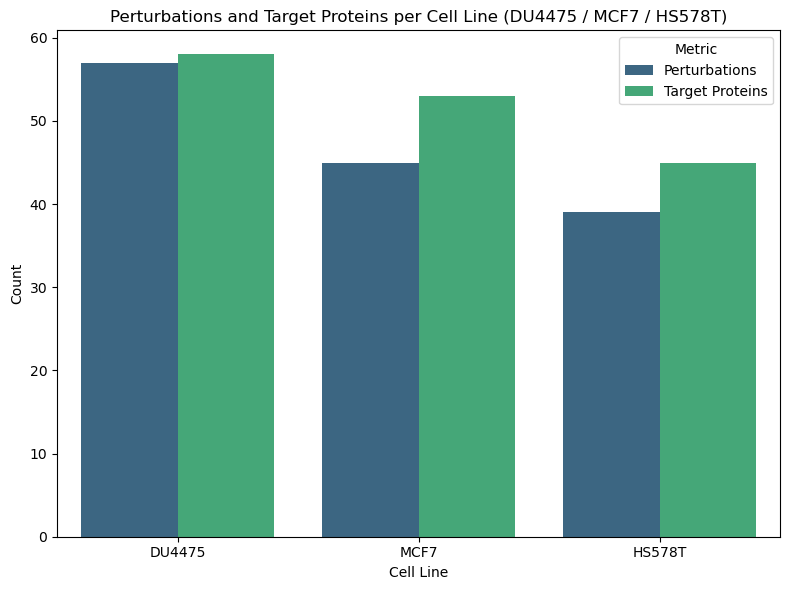

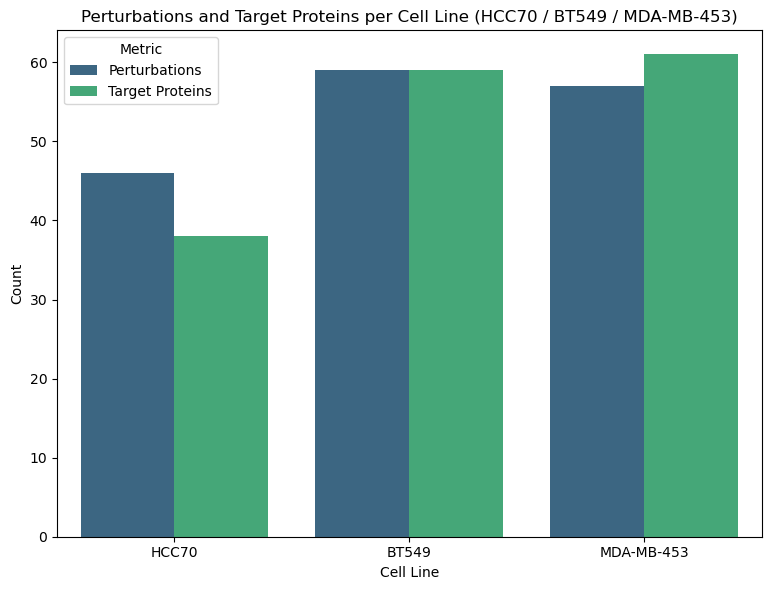

In [9]:
# Bar plots for number of perturbations and number of target proteins per cell line
# Now using 24hr proteins
# Each figure: 3 cell lines, both metrics side by side

cell_lines = ['DU4475', 'MCF7', 'HS578T', 'HCC70', 'BT549', 'MDA-MB-453']

# Count number of perturbations (rows) and number of target proteins (columns) for each cell line
n_perturbations = []
n_target_proteins = []
for cell_line in cell_lines:
    # Remove meta columns for accurate counts
    meta_cols_tgt = [col for col in tgt_prots_raw_24hr[cell_line].columns if col.startswith('meta_')]
    df_tgt = tgt_prots_raw_24hr[cell_line].drop(columns=meta_cols_tgt)
    n_perturbations.append(df_tgt.shape[0])
    n_target_proteins.append(df_tgt.shape[1])

# Create a DataFrame for plotting
df_counts = pd.DataFrame({
    'Cell Line': cell_lines,
    'Perturbations': n_perturbations,
    'Target Proteins': n_target_proteins
})

# Split into two groups of 3 cell lines each
cell_line_groups = [cell_lines[:3], cell_lines[3:]]

viridis_palette = sns.color_palette("viridis", n_colors=2)

for i, group in enumerate(cell_line_groups):
    df_group = df_counts[df_counts['Cell Line'].isin(group)].copy()
    # Melt for grouped barplot
    df_melt = df_group.melt(id_vars='Cell Line', value_vars=['Perturbations', 'Target Proteins'],
                            var_name='Metric', value_name='Count')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(data=df_melt, x='Cell Line', y='Count', hue='Metric', palette=viridis_palette, ax=ax)
    ax.set_title(f'Perturbations and Target Proteins per Cell Line ({" / ".join(group)})')
    ax.set_ylabel('Count')
    ax.set_xlabel('Cell Line')
    ax.legend(title='Metric')
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# 1. Pure Gaussian
gaussian = np.random.normal(loc=0, scale=1, size=1000)

# 2. Gaussian with more outliers (increase number of outliers)
n_outliers_2 = 20  # Increased from 5 to 20
outliers_1 = np.random.uniform(low=6, high=8, size=n_outliers_2)
outliers_2 = np.random.uniform(low=-8, high=-6, size=n_outliers_2)
gaussian_with_outliers = np.concatenate([gaussian, outliers_1, outliers_2])

# 3. Gaussian with previous outliers + even more, larger outliers
n_more_outliers_3 = 10  # Increased from 3 to 10
# These new outliers have larger magnitude than those in graph 2
more_outliers_1 = np.random.uniform(low=16, high=20, size=n_more_outliers_3)
more_outliers_2 = np.random.uniform(low=-20, high=-16, size=n_more_outliers_3)
gaussian_with_more_outliers = np.concatenate([gaussian_with_outliers, more_outliers_1, more_outliers_2])

# Plotting - all the same color
hist_color = '#8856a7'

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Flip the order of the graphs: rightmost is pure Gaussian, leftmost is Gaussian + even more, larger outliers

# Plot 1: Gaussian + Even More, Larger Outliers (leftmost)
sns.histplot(gaussian_with_more_outliers, bins=40, color=hist_color, edgecolor='black', ax=axs[0])
axs[0].set_title('Step 1')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2: Gaussian + More Outliers (middle)
sns.histplot(gaussian_with_outliers, bins=40, color=hist_color, edgecolor='black', ax=axs[1])
axs[1].set_title('Step i')
axs[1].set_xlabel('Value')

# Plot 3: Pure Gaussian (rightmost)
sns.histplot(gaussian, bins=40, color=hist_color, edgecolor='black', ax=axs[2])
axs[2].set_title('End')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()


# Independent code from prior block

In [2]:
"""PCA-ing different perturbations to see if the individual replicates from a perturbation cluster together as compared to with other experiments"""


%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.cluster.hierarchy import linkage, leaves_list, fcluster
from collections import defaultdict
from scipy.stats import spearmanr, pearsonr
import requests
import json
import sys
import os
import pickle



#//////////////////////////////////////////Part 1: loading in data //////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////

with open(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\symbol_to_uniprot.json', 'r') as f:
    symbol_to_uniprot = json.load(f)

print(f"Loaded {len(symbol_to_uniprot)} symbol-to-uniprot mappings")

data=pd.read_csv(
r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\PTV1_protein_matrix_test.cleaned.tsv',
index_col=0,sep='\t')

viability_raw=pd.read_excel(
r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\cell_viability_sampleinfo_for_chris.xlsx', 
sheet_name=0)

screen_info = pd.read_excel(
    r"C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\PTV1_sample_info_test.xlsx", 
    sheet_name=0)  # First sheet is single perturbation info


#//////////////////////////////////////////Part 2: structuring data //////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////

#making data_by_cell_line_raw; control_data_by_cell_line; control_data_by_cell_line_coeffvar:
data_T=data.transpose()
data_T['Sample_ID']=data_T.index
data_and_screen_info=pd.merge(data_T,screen_info,on='Sample_ID',how='left')
data_and_screen_info_and_viability = pd.merge(data_and_screen_info, viability_raw, on='Sample_ID', how='left')
# ///////////////////////////////////////////////////////



Loaded 20311 symbol-to-uniprot mappings


In [3]:
# Fill missing values in data_and_screen_info_and_viability with 0.8 * min of each column
from tqdm import tqdm

for col in tqdm(data_and_screen_info_and_viability.select_dtypes(include=[float, int]).columns, desc="Filling missing values"):
    min_val = data_and_screen_info_and_viability[col].min(skipna=True)
    fill_val = min_val * 0.8 if pd.notnull(min_val) else 0
    data_and_screen_info_and_viability[col] = data_and_screen_info_and_viability[col].fillna(fill_val)


Filling missing values: 100%|██████████| 5487/5487 [02:32<00:00, 35.96it/s] 


In [4]:
#running PCA using the filled in values:
from sklearn.decomposition import PCA

# Select only numeric columns for PCA (exclude metadata and non-numeric)
numeric_cols = data_and_screen_info_and_viability.select_dtypes(include=[float, int]).columns
X = data_and_screen_info_and_viability[numeric_cols].values

# Run PCA to get first 10 principal components
n_comp=2
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(X)

# Create a new DataFrame with the first 10 principal components
pca_columns = [f'PC{i+1}' for i in range(n_comp)]
pca_df = pd.DataFrame(principal_components, columns=pca_columns, index=data_and_screen_info_and_viability.index)

# Optionally, add Sample_ID or other identifiers if needed
if 'Sample_ID' in data_and_screen_info_and_viability.columns:
    pca_df['Sample_ID'] = data_and_screen_info_and_viability['Sample_ID'].values
    pca_df['Cell']=data_and_screen_info_and_viability['Cell'].values
    pca_df['Pert_ID']=data_and_screen_info_and_viability['Pert_ID'].values
    pca_df['Pert_iname']=data_and_screen_info_and_viability['Pert_iname'].values
    pca_df['pert_time_x']=data_and_screen_info_and_viability['pert_time_x'].values



C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\912767450.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_df, x='Distance type', y='Distance', palette=palette)


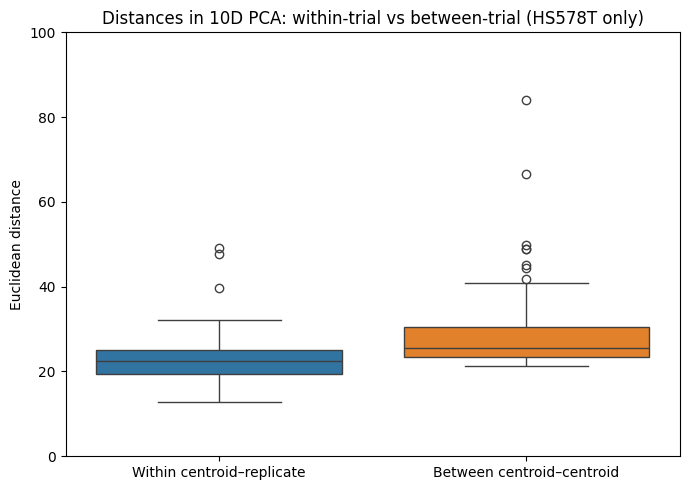

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist, squareform

# ---- Use only HS578T data
hs578t_df = data_and_screen_info_and_viability[data_and_screen_info_and_viability['Cell'] == 'HS578T'].copy()

# ---- 0) Columns to exclude from PCA
meta_cols = ['Sample_ID', 'Cell', 'Pert_ID', 'Pert_iname', 'pert_time_x']
target_cols = ['viability', 'Inhi_5', 'Inhi_05']  # adapt to your actual target names
exclude_cols = set(meta_cols + target_cols)

# ---- 1) Build X for PCA: numeric features minus metadata/targets
numeric_cols_all = hs578t_df.select_dtypes(include=[float, int]).columns
feature_cols = [c for c in numeric_cols_all if c not in exclude_cols]
X = hs578t_df[feature_cols].to_numpy(dtype=np.float64)

# ---- 2) Standardize then PCA(10)
n_comp = 10
Xz = StandardScaler().fit_transform(X)
pca = PCA(n_components=n_comp, random_state=0)
PC = pca.fit_transform(Xz)
pca_columns = [f'PC{i+1}' for i in range(n_comp)]
pca_df = pd.DataFrame(PC, columns=pca_columns, index=hs578t_df.index)

# Add identifiers
for col in meta_cols:
    if col in hs578t_df.columns:
        pca_df[col] = hs578t_df[col].values

# ---- 3) Grouping and centroids (in 10D, but for plotting use first 2 PCs)
group_cols = ['Pert_ID', 'Cell', 'pert_time_x']
centroids = pca_df.groupby(group_cols)[pca_columns].mean().reset_index()
sizes = pca_df.groupby(group_cols).size().reset_index(name='n_reps')
centroids = centroids.merge(sizes, on=group_cols, how='left')

# ---- 4) Within: mean dist from replicates to own centroid (in 10D, only if n>=2)
within = []
for _, g in pca_df.groupby(group_cols):
    if len(g) >= 2:
        cent = g[pca_columns].mean().to_numpy(dtype=np.float64).reshape(1, -1)
        d = cdist(cent, g[pca_columns].to_numpy(dtype=np.float64))[0]
        within.append(d.mean())
    else:
        within.append(np.nan)
# align order with centroids
centroids['within_mean'] = within

# ---- 5) Between: centroid-to-centroid distances (in 10D)
C = centroids[pca_columns].to_numpy(dtype=np.float64)
Dcent = squareform(pdist(C, metric='euclidean'))  # pairwise centroid distances
# For each group, mean distance to all other centroids
between_means = (Dcent.sum(axis=1) - 0) / np.maximum(len(centroids) - 1, 1)
centroids['between_mean'] = between_means

# ---- 6) Boxplot: within vs between, with different colors for each group
box_df = centroids[['within_mean','between_mean']].rename(
    columns={'within_mean':'Within centroid–replicate',
             'between_mean':'Between centroid–centroid'}
).melt(var_name='Distance type', value_name='Distance').dropna()

plt.figure(figsize=(7,5))
palette = {
    'Within centroid–replicate': '#1f77b4',   # blue
    'Between centroid–centroid': '#ff7f0e'    # orange
}
sns.boxplot(data=box_df, x='Distance type', y='Distance', palette=palette)
plt.title('Distances in 10D PCA: within‑trial vs between‑trial (HS578T only)')
plt.ylabel('Euclidean distance')
plt.xlabel('')
plt.ylim(0,100)
plt.tight_layout()
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


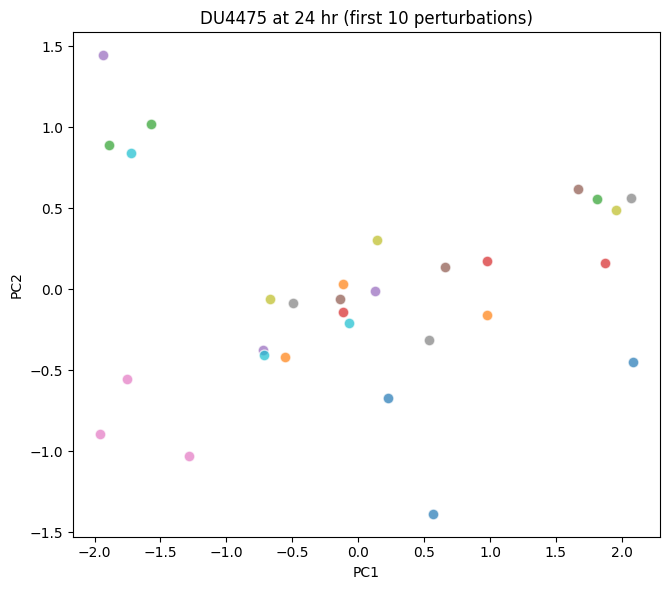

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


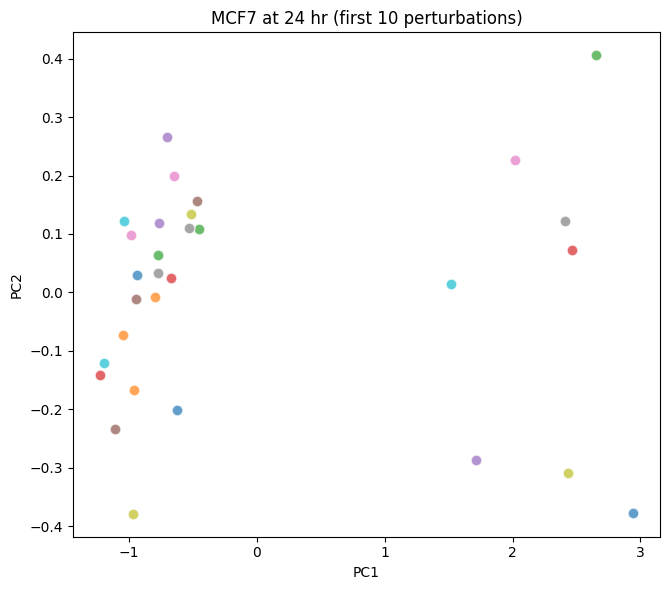

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


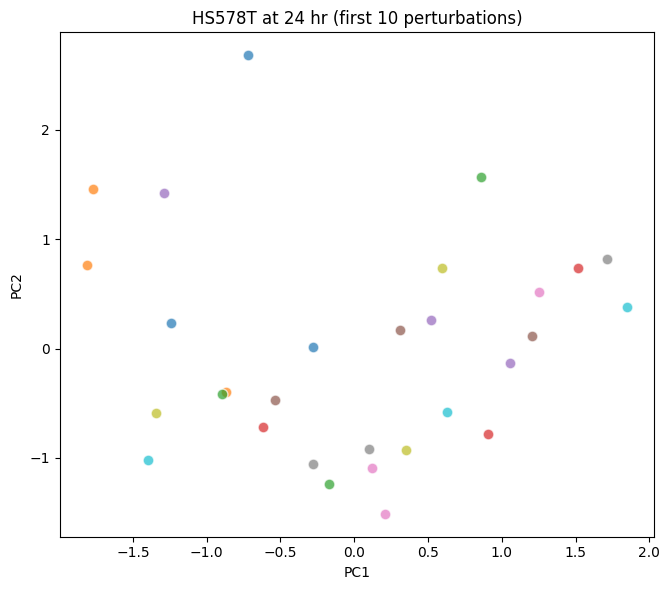

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


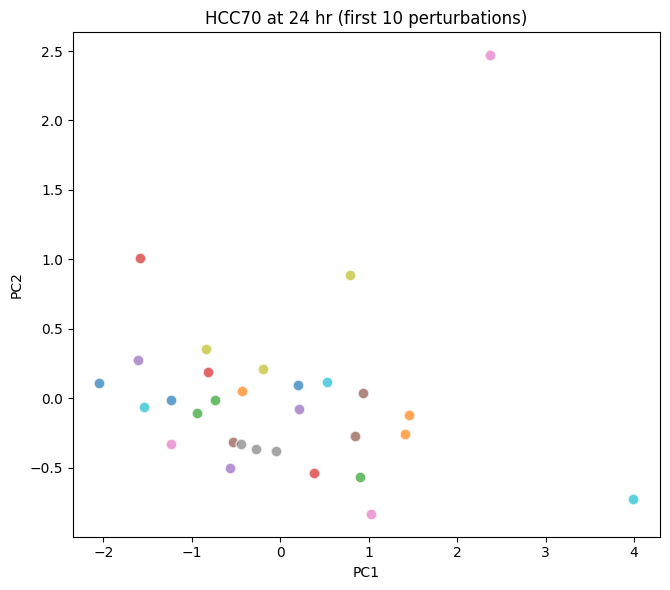

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


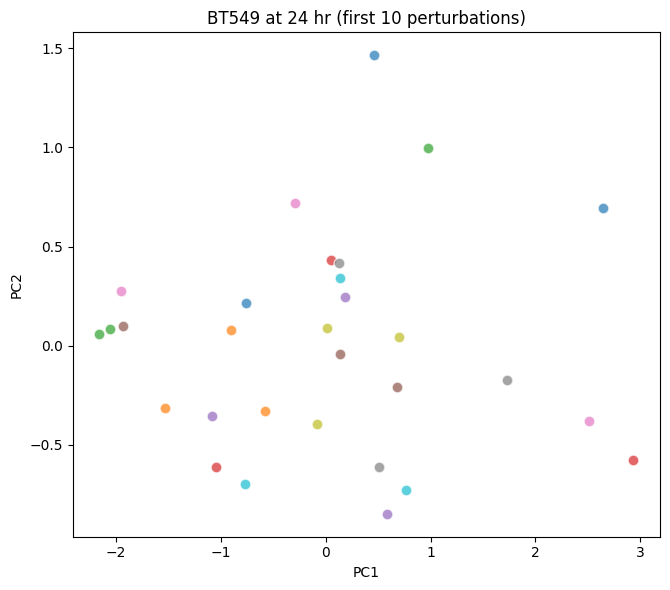

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


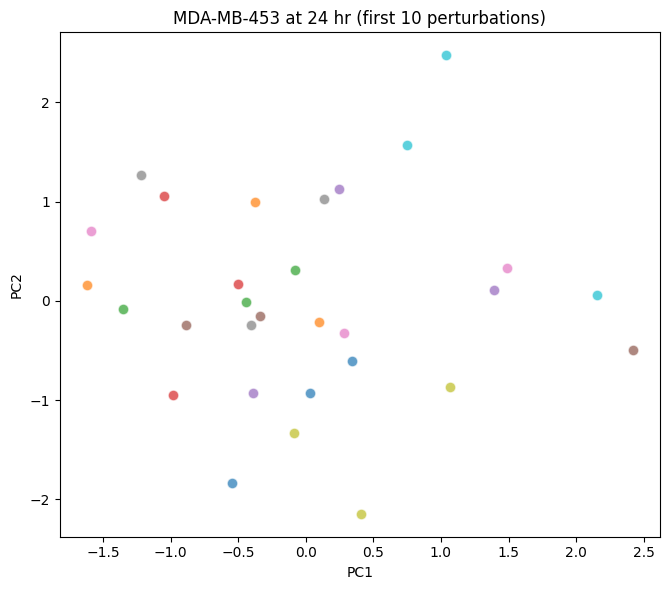

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


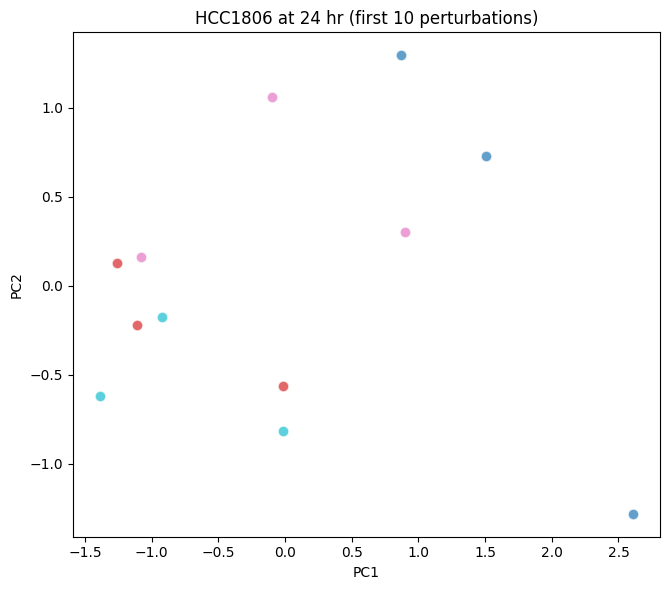

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


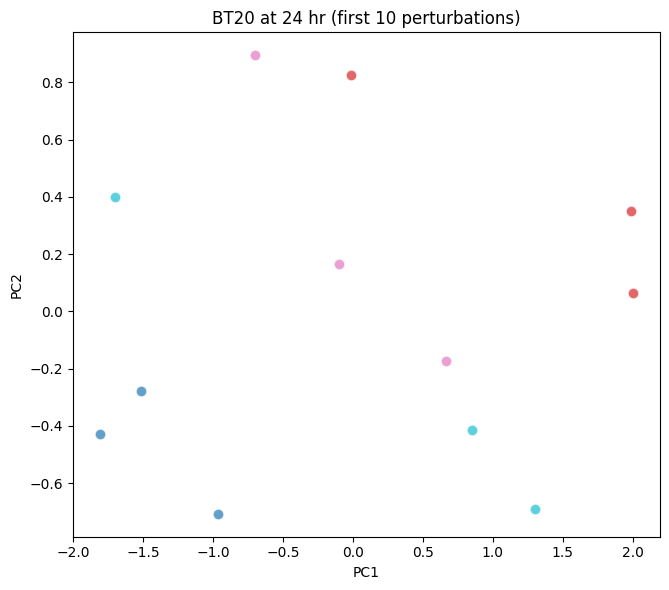

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


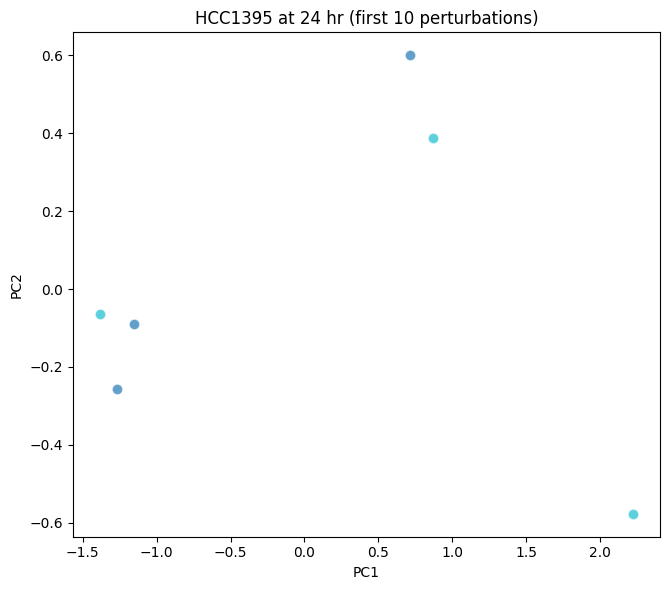

C:\Users\abdul\AppData\Local\Temp\ipykernel_26164\2614872034.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(pert_names))


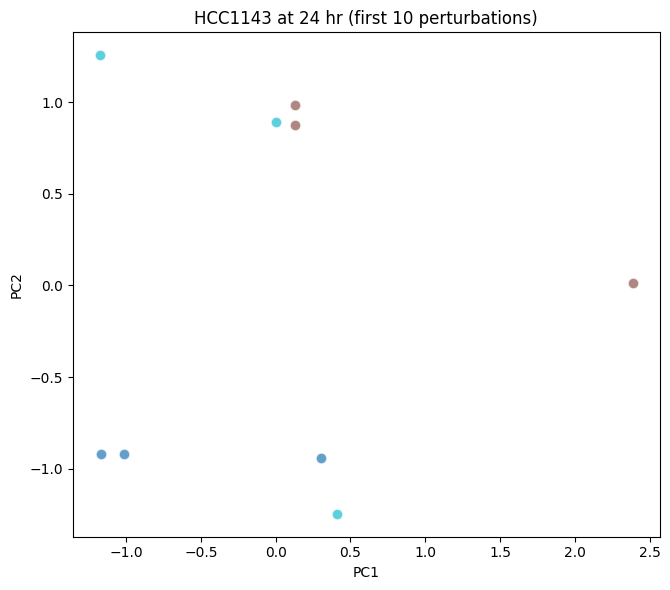

In [47]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get all unique cell lines
cell_lines = pca_df['Cell'].unique()
timepoint = 24

for cell_line in cell_lines:
    # Filter for this cell line at t=24
    subset_df = pca_df[(pca_df['Cell'] == cell_line) & (pca_df['pert_time_x'] == timepoint)]
    if subset_df.empty:
        continue

    # Get the first 10 unique perturbations for this cell line
    pert_names = subset_df['Pert_iname'].dropna().unique()[:10]
    subset_df_10 = subset_df[subset_df['Pert_iname'].isin(pert_names)]

    if subset_df_10.empty:
        continue

    # Select only the feature columns for scaling and PCA
    feature_cols = pca_columns if 'pca_columns' in locals() else [col for col in subset_df_10.columns if col.startswith('feature_') or col.startswith('PC')]
    X = subset_df_10[feature_cols].select_dtypes(include=[float, int]).values

    # Standard scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Add PCA results to the subset_df_10 for plotting
    plot_df = subset_df_10.copy()
    plot_df['PC1'] = X_pca[:, 0]
    plot_df['PC2'] = X_pca[:, 1]

    # Color map for up to 10 perturbations
    cmap = plt.cm.get_cmap('tab10', len(pert_names))
    pert_name_to_color = {name: cmap(i) for i, name in enumerate(pert_names)}

    plt.figure(figsize=(8, 6))
    for i, pert_name in enumerate(pert_names):
        mask = plot_df['Pert_iname'] == pert_name
        if mask.any():
            plt.scatter(
                plot_df.loc[mask, 'PC1'],
                plot_df.loc[mask, 'PC2'],
                label=str(pert_name),
                color=pert_name_to_color[pert_name],
                alpha=0.7,
                edgecolors='w',
                s=60
            )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{cell_line} at {timepoint} hr (first 10 perturbations)')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


In [ ]:

#averaging over replicates:(pandas mean ignores NaN's)
#preserving the control rows since they drop out for some reason:
control_rows=data_and_screen_info_and_viability[data_and_screen_info_and_viability['pert_id']=='no']
r_conts = control_rows.copy()
data_and_screen_info_and_viability_grouped = (
    data_and_screen_info_and_viability
    .groupby(['pert_id', 'Cell', 'pert_time_x'])
    .mean(numeric_only=True)
    .reset_index()
)
r_conts.loc[r_conts['pert_id'] == 'no', 'pert_id'] = 'control'
r_conts_grouped_mean=r_conts.groupby(['pert_id', 'cell_line']).mean(numeric_only=True).reset_index()
#dropping unneeded columns:
data_dropped=data_and_screen_info_and_viability_grouped.drop(columns=['BioRep_y','pert_time_y'])

#getting coeff var for control data for filtering:
intermediate=r_conts.groupby(['cell_line']).std(numeric_only=True)
inter_idx=intermediate.index
r_conts_grouped_std=intermediate.reset_index()
# Calculate coefficient of variation, but if mean exists and std is NaN, set coeff_var to 3
mean_df = r_conts_grouped_mean.select_dtypes(include=[float, int])
std_df = r_conts_grouped_std.select_dtypes(include=[float, int])
coeff_var = std_df / mean_df

# Find where mean is not NaN and std is NaN, set coeff_var to 3 in those places
mask = mean_df.notna() & std_df.isna()
coeff_var[mask] = -.25
coeff_var['cell_line']=inter_idx

#dropping the irrelevant timepoints, (6 and 48)
data_dropped=data_dropped[data_dropped['pert_time_x']==6]

#//////////metadata codeblock
# Move the first three columns to the end of data_dropped
first_three_cols = data_dropped.columns[:3]
other_cols = data_dropped.columns[3:]
data_dropped = data_dropped.loc[:, list(other_cols) + list(first_three_cols)]
# Rename the last 10 columns of data_dropped by adding 'meta_' as a prefix
cols = list(data_dropped.columns)
last_9 = cols[-8:]
new_last_9 = ['meta_' + col for col in last_9]
rename_dict = dict(zip(last_9, new_last_9))
data_dropped = data_dropped.rename(columns=rename_dict)
#////////////////////////

#generating the dictionaries by cell line
data_by_cell_line_raw={}
control_data_by_cell_line={}
control_data_by_cell_line_coeffvar={}
cell_lines=pd.unique(data_and_screen_info_and_viability_grouped['Cell'])
for cell in cell_lines:
    data_by_cell_line_raw[cell]=data_dropped[data_dropped['meta_Cell']==cell]
    control_data_by_cell_line[cell]=r_conts_grouped_mean[r_conts_grouped_mean['cell_line']==cell]
    control_data_by_cell_line_coeffvar[cell]=coeff_var[coeff_var['cell_line']==cell]
    control_data_by_cell_line_coeffvar[cell].drop(columns=['cell_line'],inplace=True)

#//////////////////////////////////////////Part 3: renaming from pert-ID to drug name to group trials //////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////
#making drug_pert_id_targets_dict
drugs_and_targets = pd.read_csv(
    r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\ptv1_unique_drug_names.csv'
)
drugs_and_targets.rename(columns={'original_drug_names': 'pert_name'}, inplace=True)
drugs_and_targets.dropna(inplace=True,subset=['pert_name'])

# Read and process drugs_and_pert_ids
drugs_and_pert_ids = pd.read_csv(
    r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\TNBC_set\PTV1_sample_info_test.csv'
)

drugs_and_pert_ids = (
    drugs_and_pert_ids
    .drop_duplicates(subset=['pert_id'])
    .drop_duplicates(subset=['pert_name'])
    .loc[:, ['pert_id', 'pert_name']]
    .assign(pert_id=lambda df: df['pert_id'].str.replace('#', ''))
    .dropna()
    .assign(pert_id=lambda df: df['pert_id'].astype(int))
    .sort_values('pert_id')
    .reset_index(drop=True)
)

# Merge and drop unnecessary columns
drugs_pert_ids_targets = (
    pd.merge(drugs_and_pert_ids, drugs_and_targets, on='pert_name', how='left')
    .drop(columns=['corrected_drug_name', 'drugbank_targets_manual_check'], errors='ignore')
)

# Build dictionary mapping pert_id and pert_name to list of targets
drug_pert_id_targets_dict = {}
for _, row in drugs_pert_ids_targets.iterrows():
    targets = []
    if pd.notnull(row.get('target_uniprot_ids')):
        targets = [t.strip() for t in str(row['target_uniprot_ids']).split(',') if t.strip()]
    drug_pert_id_targets_dict[row['pert_id']] = targets
    drug_pert_id_targets_dict[row['pert_name']] = targets
